In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

W0814 16:40:41.509893  1032 __init__.py:689] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [4]:
def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i,  word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

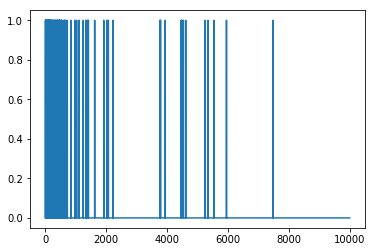

In [5]:
plt.plot(train_data[0])

In [7]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics = ['accuracy', 'binary_crossentropy'])

baseline_model.summary()

W0814 17:11:50.612942  1032 deprecation.py:323] From c:\users\ankit.dubey\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

W0814 17:13:27.388705  1032 deprecation.py:323] From c:\users\ankit.dubey\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\keras\optimizer_v2\optimizer_v2.py:466: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
Epoch 1/20
25000/25000 - 4s - loss: 0.3256 - acc: 0.8778 - binary_crossentropy: 0.3256
25000/25000 - 8s - loss: 0.4708 - acc: 0.8117 - binary_crossentropy: 0.4708 - val_loss: 0.3256 - val_acc: 0.8778 - val_binary_crossentropy: 0.3256
Epoch 2/20
Epoch 1/20
25000/25000 - 3s - loss: 0.2835 - acc: 0.8883 - binary_crossentropy: 0.2835
25000/25000 - 7s - loss: 0.2428 - acc: 0.9131 - binary_crossentropy: 0.2428 - val_loss: 0.2835 - val_acc: 0.8883 - val_binary_crossentropy: 0.2835
Epoch 3/20
Epoch 1/20
25000/25000 - 3s - loss: 0.2924 - acc: 0.8833 - binary_crossentropy: 0.2924
25000/25000 - 7s - loss: 0.1790 - acc: 0.9377 - binary_crossentropy: 0.1790 - val_loss: 0.2924 - val_acc: 0.8833 - val_binary_crossentropy: 0.2924
Epoch 4/20
Epoch 1/20
25000/25000 - 3s - loss: 0.3265 - acc: 0.8739 - binary_crossentropy: 0.3265
25000/25000 - 7s - loss: 0.1459 - acc: 0.9498 - binary_crossentropy: 0.1459 - val_loss: 0.3265 - val_acc: 0.8739 - va

In [9]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [10]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
Epoch 1/20
25000/25000 - 3s - loss: 0.5314 - acc: 0.7781 - binary_crossentropy: 0.5314
25000/25000 - 7s - loss: 0.5911 - acc: 0.7221 - binary_crossentropy: 0.5911 - val_loss: 0.5314 - val_acc: 0.7781 - val_binary_crossentropy: 0.5314
Epoch 2/20
Epoch 1/20
25000/25000 - 3s - loss: 0.4897 - acc: 0.8313 - binary_crossentropy: 0.4897
25000/25000 - 7s - loss: 0.4858 - acc: 0.8512 - binary_crossentropy: 0.4858 - val_loss: 0.4897 - val_acc: 0.8313 - val_binary_crossentropy: 0.4897
Epoch 3/20
Epoch 1/20
25000/25000 - 3s - loss: 0.4699 - acc: 0.8455 - binary_crossentropy: 0.4699
25000/25000 - 6s - loss: 0.4409 - acc: 0.8913 - binary_crossentropy: 0.4409 - val_loss: 0.4699 - val_acc: 0.8455 - val_binary_crossentropy: 0.4699
Epoch 4/20
Epoch 1/20
25000/25000 - 3s - loss: 0.4533 - acc: 0.8609 - binary_crossentropy: 0.4533
25000/25000 - 6s - loss: 0.4099 - acc: 0.9123 - binary_crossentropy: 0.4099 - val_loss: 0.4533 - val_acc: 0.8609 - va

In [12]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [13]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
Epoch 1/20
25000/25000 - 7s - loss: 0.3192 - acc: 0.8686 - binary_crossentropy: 0.3192
25000/25000 - 18s - loss: 0.3471 - acc: 0.8499 - binary_crossentropy: 0.3471 - val_loss: 0.3192 - val_acc: 0.8686 - val_binary_crossentropy: 0.3192
Epoch 2/20
Epoch 1/20
25000/25000 - 6s - loss: 0.3279 - acc: 0.8746 - binary_crossentropy: 0.3279
25000/25000 - 17s - loss: 0.1442 - acc: 0.9482 - binary_crossentropy: 0.1442 - val_loss: 0.3279 - val_acc: 0.8746 - val_binary_crossentropy: 0.3279
Epoch 3/20
Epoch 1/20
25000/25000 - 6s - loss: 0.4367 - acc: 0.8697 - binary_crossentropy: 0.4367
25000/25000 - 18s - loss: 0.0452 - acc: 0.9870 - binary_crossentropy: 0.0452 - val_loss: 0.4367 - val_acc: 0.8697 - val_binary_crossentropy: 0.4367
Epoch 4/20
Epoch 1/20
25000/25000 - 6s - loss: 0.5867 - acc: 0.8707 - binary_crossentropy: 0.5867
25000/25000 - 17s - loss: 0.0068 - acc: 0.9989 - binary_crossentropy: 0.0068 - val_loss: 0.5867 - val_acc: 0.8707 

In [ ]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot()